In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [9]:
df = pd.read_csv('classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,0.0,1025,22,10,99,18,2016,3,0


In [10]:
df.shape

(155223, 25)

# Feature selection

<AxesSubplot:>

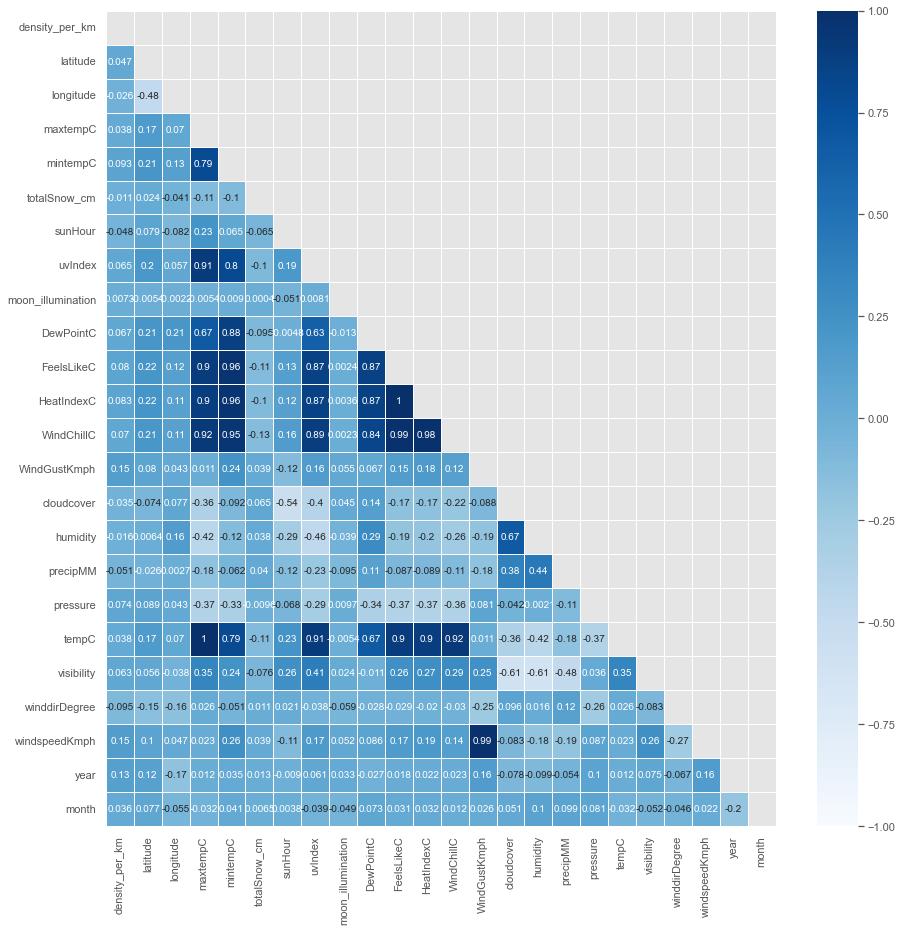

In [11]:
plt.figure(figsize=(15,15))
data = df.iloc[:,:-1]
matrix = np.triu(data.corr())
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1, mask=matrix, linewidths=.5 , cmap='Blues')

In [12]:
threshold=0.8

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(df.iloc[:,:-1],threshold)

{'DewPointC',
 'FeelsLikeC',
 'HeatIndexC',
 'WindChillC',
 'tempC',
 'uvIndex',
 'windspeedKmph'}

In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,:-1]  #independent columns
y = df['Target'] #target column

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [18]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.0988885  0.12906669 0.14880786 0.02717484 0.03372789 0.00025808
 0.03198183 0.01966732 0.02407869 0.03237365 0.03348339 0.03419949
 0.0339693  0.02559407 0.03092148 0.02676464 0.02348312 0.03018641
 0.02729803 0.01751042 0.03360988 0.02533897 0.03520835 0.0764071 ]


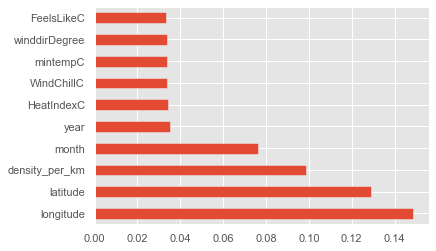

In [26]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()